In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [13]:
df = pd.read_json('json/corpus.json')
df = df.reset_index().drop(columns = ['index'])

In [18]:
df.head(1)

,track_id,title_billboard,artist_billboard,title_spotify,artist_spotify,key,time_signature,mode,tempo,loudness,duration_ms,energy,valence,genre_list,weeks_list,ranks_list,highest_rank
0,5ayybTSXNwcarDtxQKqvWX,Poor Little Fool,Ricky Nelson,Poor Little Fool - Remastered,Ricky Nelson,0,4,1,154.999,-11.573,153933,0.332,0.795,"[adult standards, brill building pop, bubblegu...",[1958-08-08],[1],1


In [86]:
len(df)

19098

In [19]:
df['#weeks'] = 0

for ind, row in df.iterrows():
    df['#weeks'][ind] = len(row['weeks_list'])

In [21]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style("ticks")

In [31]:
df['#weeks'].value_counts().sort_index(
    ascending = True)

1      736
2     1051
3     1170
4     1203
5     1326
6     1489
7     1493
8     1356
9     1162
10    1100
11    1018
12     971
13     837
14     711
15     633
16     495
17     437
18     500
19     424
20     259
21     183
22     132
23     116
24      77
25      72
26      36
27      31
28      21
29       7
30       5
31       8
32       6
33       4
34       2
35       5
36       3
37       6
38       3
39       2
40       2
41       3
42       2
53       1
Name: #weeks, dtype: int64

In [92]:
df['#weeks'].sum()

177700

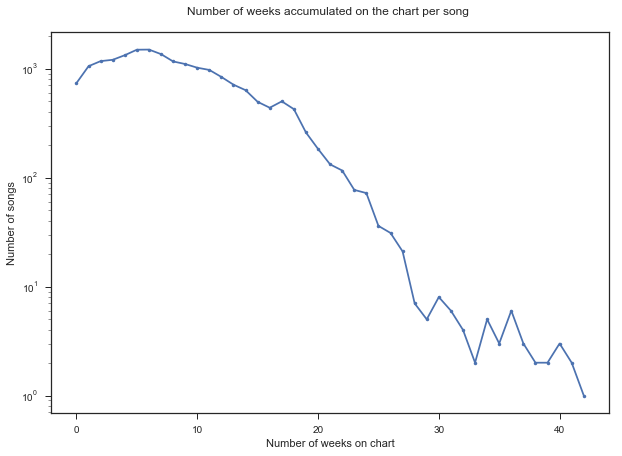

In [41]:
df_ = df['#weeks'].value_counts().sort_index(
    ascending = True).reset_index()['#weeks']
plt.semilogy(df_.index, df_.values, '.-')
plt.xlabel('Number of weeks on chart')
plt.ylabel('Number of songs')
plt.title('Number of weeks accumulated on the chart per song \n')
plt;

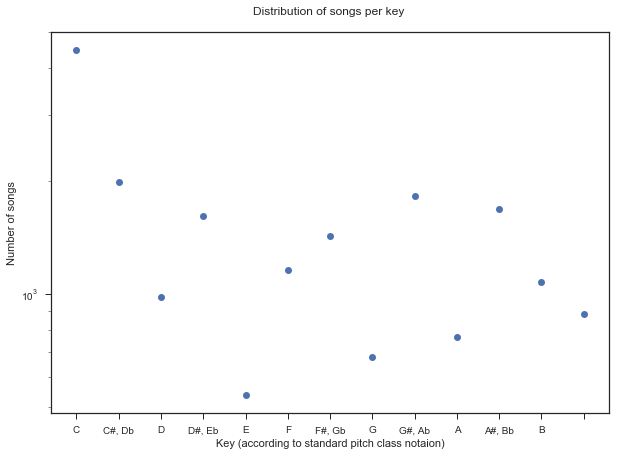

In [64]:
df_ = df['key'].value_counts().sort_index(
    ascending = True).reset_index()['key']
plt.semilogy(df_.index, df_.values, 'o')
plt.xlabel('Key (according to standard pitch class notaion)')

plt.xticks(np.arange(13), ['C', 'C#, Db', 'D', 'D#, Eb', 'E', 'F', 'F#, Gb', 'G', 'G#, Ab', 'A',
                          'A#, Bb', 'B'])

plt.ylabel('Number of songs')
plt.title('Distribution of songs per key \n')
plt;

In [66]:
sns.set(rc={'figure.figsize':(5,7)})
sns.set_style("ticks")

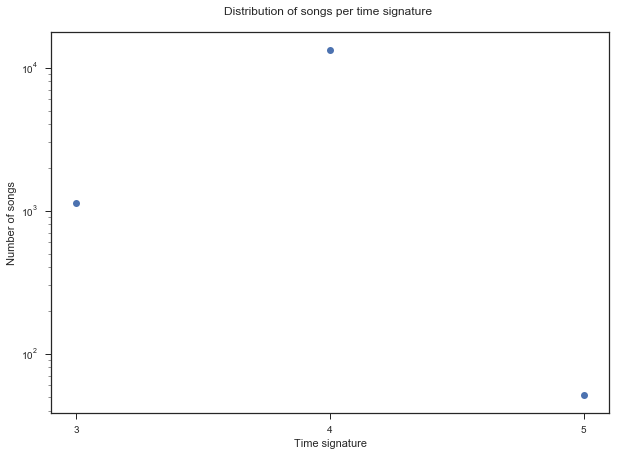

In [84]:
df_ = df[df['time_signature'] != -1]
df_ = df_[df_['time_signature'] != 1]
df_ = df_['time_signature'].value_counts().sort_index(
    ascending = True).reset_index()['time_signature']
plt.semilogy(df_.index, df_.values, 'o')
plt.xlabel('Time signature')

plt.xticks([0, 1, 2], [3, 4, 5])

plt.ylabel('Number of songs')
plt.title('Distribution of songs per time signature \n')
plt;

In [85]:
df_

0     1137
1    13357
2       51
Name: time_signature, dtype: int64

In [68]:
sns.set(rc={'figure.figsize':(3,7)})
sns.set_style("ticks")

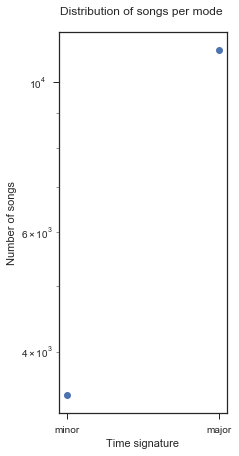

In [70]:
df_ = df[df['mode'] != -1]
df_ = df_['mode'].value_counts().sort_index(
    ascending = True).reset_index()['mode']
plt.semilogy(df_.index, df_.values, 'o')
plt.xlabel('Time signature')

plt.xticks([0, 1], ['minor', 'major'])

plt.ylabel('Number of songs')
plt.title('Distribution of songs per mode \n')
plt;

In [82]:
df[['tempo', 'loudness', 'duration_ms', 'energy', 'valence']].describe()

,tempo,loudness,duration_ms,energy,valence
count,19098.000000,19098.000000,1.909800e+04,19098.000000,19098.000000
mean,91.358153,-8.001855,1.664485e+05,0.212130,0.266076
std,56.376115,4.892483,1.156890e+05,0.695215,0.730309
min,-1.000000,-29.467000,-1.000000e+00,-1.000000,-1.000000
25%,73.745250,-11.508000,1.204432e+05,0.172000,0.151250
50%,108.498500,-8.624000,1.763065e+05,0.495500,0.575000
75%,128.098500,-4.022750,2.387650e+05,0.696000,0.805000
max,241.009000,2.291000,3.079158e+06,0.997000,1.000000


In [93]:
df['mode'].value_counts()

 1    11165
-1     4486
 0     3447
Name: mode, dtype: int64

In [94]:
df['time_signature'].value_counts()

 4    13357
-1     4486
 3     1137
 1       67
 5       51
Name: time_signature, dtype: int64

In [95]:
df['year'] = 0

In [ ]:
for ind, row in df.iterrows():
    df['year'][ind] 